In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d.art3d import Line3DCollection
%matplotlib ipympl

In [39]:
dataFrames = []
for rank in [0, 1, 2, 3, 4, 5, 6, 7]:
    dataFrames.append(pd.read_csv("./output/{}_log.csv".format(rank)))

In [40]:
dataFrames[6].tail()

,x,y,z,i,ghost,nbrs
45,6,4,2,162,0,134|137|138|141|158|159|165|166|
46,6,5,1,165,0,137|140|141|144|161|162|168|169|
47,6,5,3,166,1,138|141|145|162|169|
48,6,6,0,168,0,140|144|165|
49,6,6,2,169,0,141|144|145|165|166|


In [41]:
points = []
idxToPoint = {}
for rank in [0, 1, 2, 3, 4, 5, 6, 7]:
    df = dataFrames[rank]
    for index, row in df.iterrows():
        point = {}
        point["x"] = row["x"]
        point["y"] = row["y"]
        point["z"] = row["z"]
        point["i"] = row["i"]
        point["ghost"] = row["ghost"]
        point["nbrs"] = []
        point["rank"] = rank
        s = row["nbrs"].split("|")
        for nbr in s:
            if len(nbr) > 0:
                point["nbrs"].append(int(nbr))
        idxToPoint[point["i"]] = point
        points.append(point)

In [42]:
p1s = []
p2s = []
for i in range(len(points)):
    for j in range(len(points[i]["nbrs"])):
        A = points[i]
        B = idxToPoint[points[i]["nbrs"][j]]
        p1s.append([ A["x"], A["y"], A["z"] ])
        p2s.append([ B["x"], B["y"], B["z"] ])
p1s = np.array(p1s)
p2s = np.array(p2s)

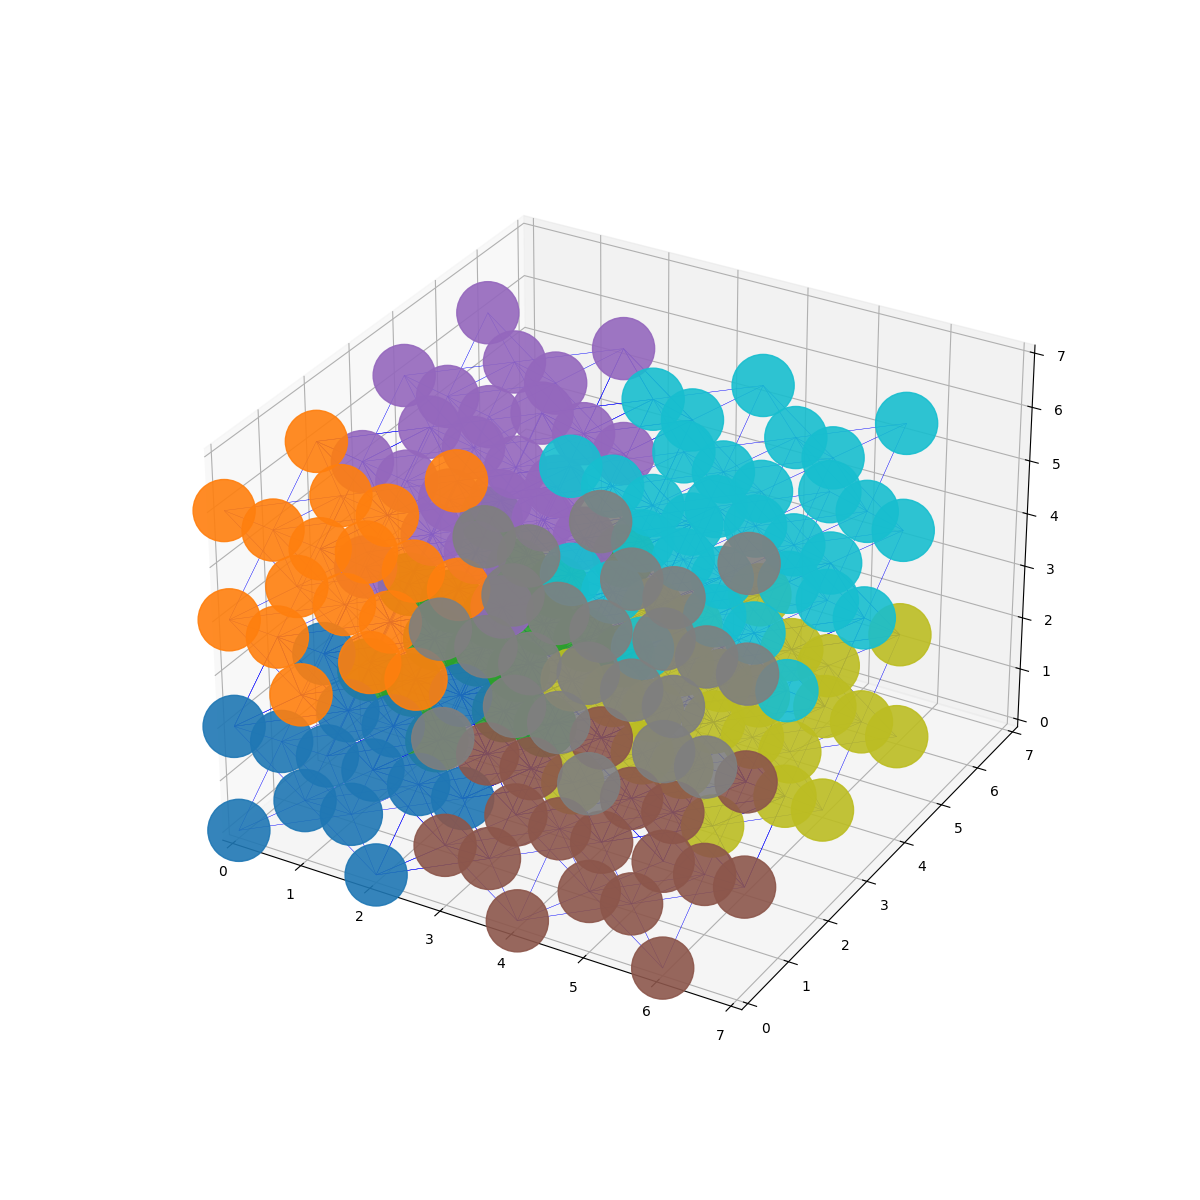

In [43]:
plt.close("all")
x = []
y = []
z = []
c = []
for i in range(len(points)):
    if(points[i]["ghost"] == 0):
        x.append(points[i]["x"])
        y.append(points[i]["y"])
        z.append(points[i]["z"])
        c.append(points[i]["rank"] % 10)

lines = np.hstack([np.array(p1s), np.array(p2s)]).copy()
lines = lines.reshape((-1,2,3))
line_collection = Line3DCollection(lines, linewidths=0.25, colors='b', alpha=0.75)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection="3d")
ax.add_collection(line_collection)
scatter = ax.scatter(x, y, z, c = c, s=2000, cmap = "tab10", alpha = 0.9)
ax.set_xlim([0, 7])
ax.set_ylim([0, 7])
ax.set_zlim([0, 7])
plt.savefig("./3DFCC.png")